# Hillary Emain Controversy

This notebook present an introduction to text analysis : [Taming Text](https://github.com/loistal/ADA_labs/blob/master/05-%20Tamming%20Text/README.md).

In [27]:
import pandas as pd
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
emails = pd.read_csv('./hillary-clinton-emails/emails.csv')

## WordCloud

In this part we will generate word clouds with the [wordcloud](https://github.com/amueller/word_cloud) Python library, and try to see what's the impact of text pre-processing on these clouds.

### From Raw Text

First, let's take the raw text and see what we get.

In [14]:
# Data overview
emails.head(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


We will take into account the `ExtractedSubject` and `ExtractedBodyText` features for the world clouds. It seems that a lot of `ExtractedBodyText` are NaN, because this column is an attempt to extract the text, but taking the `RawText` column might be wrong given that it certainly contains replies, so words that could be counted multiple times accross emails. 

In [64]:
# Extract data
subject = emails['ExtractedSubject'].dropna()
body = emails['ExtractedBodyText'].dropna()

# Get a list of strings
text = list(subject) + list(body)

# Join the strings
text = ' '.join(text).lower()

We disable the built-in stopword processing to generate the cloud (we couldn't manage to disable to built-in tokenization function): 

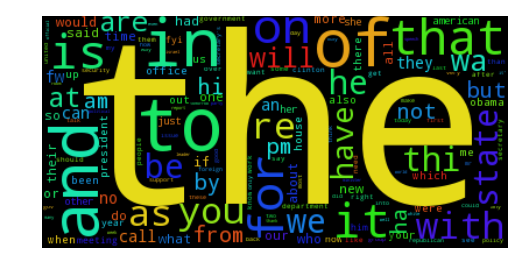

In [65]:
# Generate wordcloud without stop words
wordcloud = WordCloud(stopwords=[]).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can see, it's beautiful, but not quite satisfying. There are a lot of stop words, and irrelevant words that we want to avoid. To avoid this, we will try to perform a simple pre-processing pipeline.

### From Pre-processed Text

First, we tokenize our text with the `TweetTokenizer` from `nltk` package : 

In [84]:
from nltk.tokenize import TweetTokenizer

tokens = TweetTokenizer().tokenize(text)
print('{} words.'.format(len(tokens)))
tokens[:10]

736853 words.


['fw', ':', 'wow', 're', ':', 'chris', 'stevens', 'fvv', ':', 'cairo']

Now we remove the stopwords and small words using the wordcloud stopwords list : 

In [92]:
from wordcloud import STOPWORDS

stopwords = list(STOPWORDS)
stopwords.append('will')

tokens = [w for w in tokens if w not in stopwords and len(w) > 2]
print('{} words.'.format(len(tokens)))
tokens[:10]

344677 words.


['wow',
 'chris',
 'stevens',
 'fvv',
 'cairo',
 'condemnation',
 'final',
 'meet',
 'right',
 'wing']

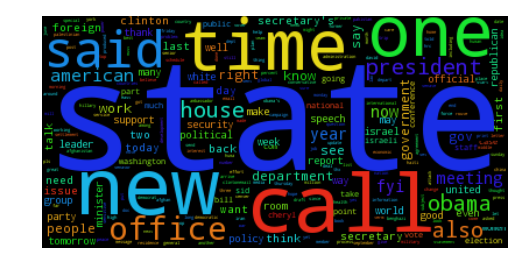

In [89]:
wordcloud = WordCloud(stopwords=[], max_words=3000).generate(' '.join(tokens))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [93]:
from nltk.stem.lancaster import LancasterStemmer

st = LancasterStemmer()

t = list(map(lambda w : st.stem(w), tokens))

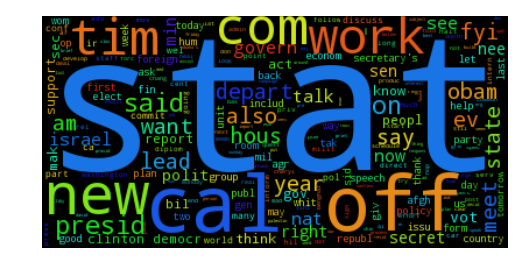

In [94]:
wordcloud = WordCloud(stopwords=[], max_words=3000).generate(' '.join(t))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()